<a href="https://colab.research.google.com/github/MadgeneM/DDS8555/blob/main/MoiseMDDS8555_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: Assignment 4
# Author: Madgene Moise
# Date: Sunday, June 8, 2025

The following section answers the Conceptual Question #3 from page 326 of the textbook titled “An Introduction to Statistical Learning with Applications in Python” (ISLR Python), a.k.a. the Python edition (ISLP). The following Python programming script was written to answer Question #3 from page 326.

In [ ]:
# Generate a plot of the estimated curve.

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

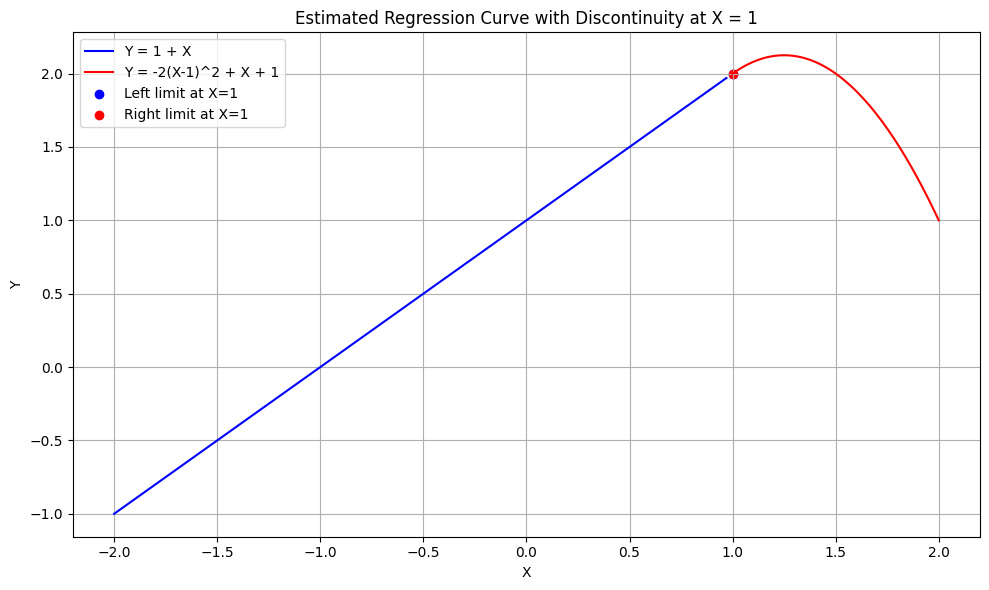

In [ ]:
# Define the piecewise functions
def model_left(x):
    return 1 + x  # For x < 1

def model_right(x):
    return -2 * x**2 + 5 * x - 1  # For x >= 1

# Create X values
x_left = np.linspace(-2, 1, 100, endpoint=False)
x_right = np.linspace(1, 2, 100)

# Calculate Y values
y_left = model_left(x_left)
y_right = model_right(x_right)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_left, y_left, label="Y = 1 + X", color='blue')
plt.plot(x_right, y_right, label="Y = -2(X-1)^2 + X + 1", color='red')
plt.scatter([1], [model_left(1)], color='blue', label="Left limit at X=1")
plt.scatter([1], [model_right(1)], color='red', label="Right limit at X=1")

# Highlight the discontinuity
plt.vlines(x=1, ymin=model_left(1), ymax=model_right(1), linestyles='dashed', colors='gray')

# Labels and legend
plt.title("Estimated Regression Curve with Discontinuity at X = 1")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot above illustrates the blue line at (X <1) and the linear segment at Y=1+X. This blue line starts at (-2,-1) and ends just before X=1 at (1^-,2). Similarly, the plot above showcases the red curve at (X ≥1) and a parabolic segment at Y= -2(X-1)^2+X+1. This red curve starts at (1,4), showing a jump discontinuity from the linear segment and decreasing to (2,1). Discontinuity is observed at X=1, there is a jump from Y=2 (left limit) to Y=4 (right limit). In other words, this visualization reflects how the basis function b_2 (X)= (X-1)^2 I(X ≥1) introduces a nonlinear component that only activates when X ≥1, causing the discontinuity and curved behavior.



---


The following section answers the Applied Question #8 from page 327 of the textbook titled “An Introduction to Statistical Learning with Applications in Python” (ISLR Python), a.k.a. the Python edition (ISLP). The following Python programming script was written to answer Question #8 from page 327.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the Auto dataset from the ISLR package
auto_data = sm.datasets.get_rdataset("Auto", "ISLR").data

# Drop rows with missing values
auto_data = auto_data.dropna()

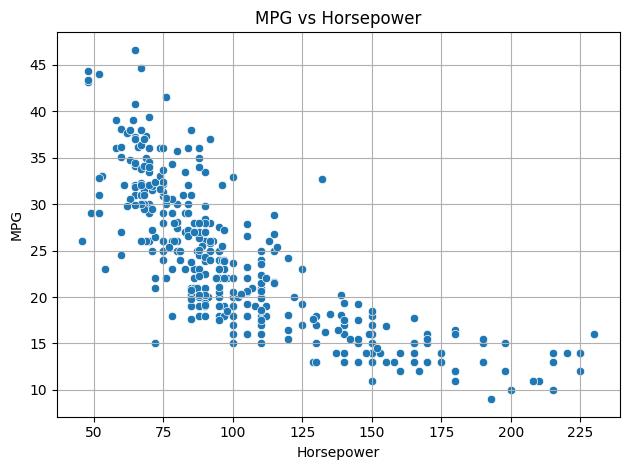

In [ ]:
# Focus on predicting mpg using horsepower (a known nonlinear relationship)
# Visualize the scatterplot first
sns.scatterplot(data=auto_data, x='horsepower', y='mpg')
plt.title("MPG vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Clean 'horsepower' column: convert to numeric and drop NAs
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna(subset=['horsepower'])

# Extract predictor and response
X = auto_data[['horsepower']]
y = auto_data['mpg']

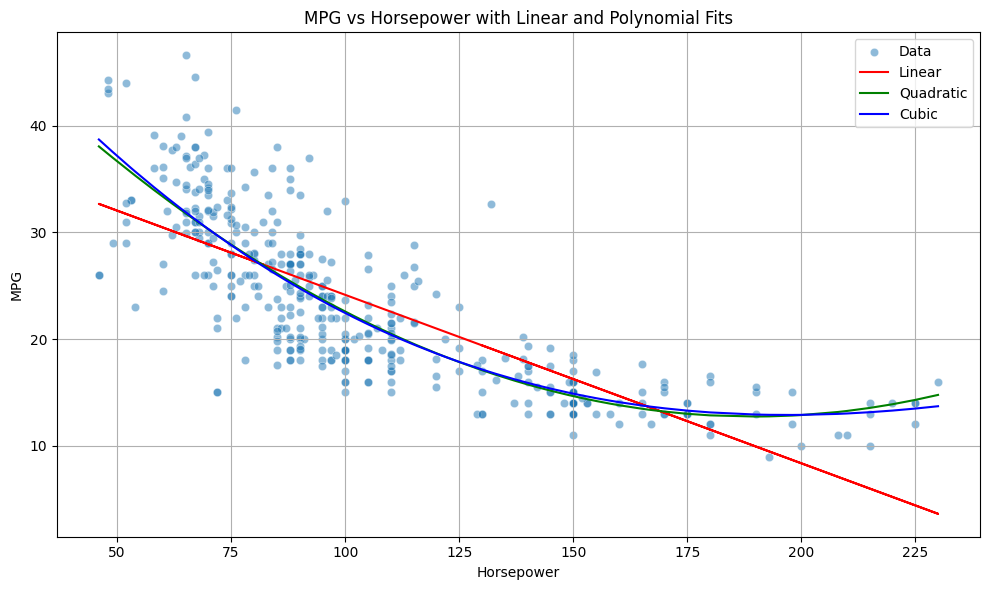

In [ ]:
# Fit linear model
linear_model = LinearRegression().fit(X, y)
y_pred_linear = linear_model.predict(X)

# Fit quadratic model
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X)
quad_model = LinearRegression().fit(X_poly2, y)
y_pred_quad = quad_model.predict(X_poly2)

# Fit cubic model
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
cubic_model = LinearRegression().fit(X_poly3, y)
y_pred_cubic = cubic_model.predict(X_poly3)

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=auto_data, label='Data', alpha=0.5)
plt.plot(X, y_pred_linear, label='Linear', color='red')
plt.plot(X.sort_values(by='horsepower'),
         y_pred_quad[np.argsort(X['horsepower'].values)], label='Quadratic', color='green')
plt.plot(X.sort_values(by='horsepower'),
         y_pred_cubic[np.argsort(X['horsepower'].values)], label='Cubic', color='blue')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower with Linear and Polynomial Fits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

I examined the auto data set and reviewed the relevant variables for examining non-linear relationships with miles per gallon (mpg), which include horsepower, weight, displacement, and acceleration. I explored non-linearity in the relationship between mpg and horsepower using linear regression, polynomial regression (quadratic and cubic), and residual and fit plots.

The plot shows the relationship between mpg and horsepower along with three regression fits: (1) the red line (linear regression), (2) the green line (quadratic regression), and (3) the blue line (cubic regression). The linear regression (red line) is a straight line that underfits the data. It misses the curvature in the relationship between mpg and horsepower. On the other hand, the quadratic regression line (green line) captures the downward curve much better than the linear model, especially in the midrange. The cubic regression line (blue line) adds slight flexibility, tracking minor curvature and potentially providing a slightly better fit than the quadratic.

Overall, there is strong evidence of non-linear relationships between mpg and horsepower. The quadratic and cubic models clearly outperform the linear model in capturing the shape of the data. This is visually evident from how much better they align with the actual data points.